In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
from torch.utils.data import Dataset,DataLoader,TensorDataset
from tqdm import tqdm
import pandas as pd
import os
import warnings
warnings.filterwarnings(action='ignore')
import cv2
from google.colab.patches import cv2_imshow

In [3]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 13.7 MB/s eta 0:00:00


In [16]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
# 시간이 좀 걸립니다. (약 3분)
from ultralytics import YOLO
torch.manual_seed(1234)
# model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model = YOLO('yolov8m.pt')
model.train(data='/content/drive/MyDrive/멀쩡한강아지눈바운딩박스/data/dataset.yaml', epochs=50)  # train the model
# save the model to TorchScript format
if not os.path.exists('./models'):
    os.makedirs('./models')
model.export(format='torchscript')

100%|██████████| 49.7M/49.7M [00:00<00:00, 384MB/s]

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/멀쩡한강아지눈바운딩박스/data/dataset.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torc

train: Scanning /content/drive/MyDrive/멀쩡한강아지눈바운딩박스/data/labels/train.cache... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/멀쩡한강아지눈바운딩박스/data/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.11G      1.968      4.453      1.588         63        640: 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all          5         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       7.3G      2.056      4.489      1.628         45        640: 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.91it/s]

                   all          5         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.27G      2.094      4.529      1.632         52        640: 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]

                   all          5         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.27G      2.478      4.053      1.849         54        640: 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all          5         10       0.69        0.5      0.507      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.47G      2.028      2.212      1.449         64        640: 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all          5         10      0.818        0.5      0.479      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.49G      1.879      1.669      1.326         44        640: 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.07it/s]

                   all          5         10      0.102      0.261     0.0978     0.0736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.49G      1.776      1.649       1.29         59        640: 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.26it/s]

                   all          5         10      0.087        0.5     0.0458     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.47G      1.608      1.418       1.22         56        640: 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all          5         10     0.0444        0.5     0.0242     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.47G      1.541      1.264      1.206         57        640: 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]

                   all          5         10      0.556        0.6      0.384      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.52G      1.755      1.227      1.243         59        640: 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.98it/s]

                   all          5         10     0.0526        0.6     0.0348     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.52G      1.728      1.216      1.274         55        640: 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.06it/s]

                   all          5         10     0.0368        0.6     0.0233    0.00905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.53G      1.774      1.282      1.294         49        640: 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]

                   all          5         10     0.0377        0.6     0.0265       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.52G      1.657      1.175      1.303         38        640: 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.39it/s]

                   all          5         10     0.0365        0.6     0.0252     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.51G      1.512      1.062      1.264         43        640: 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.01it/s]

                   all          5         10     0.0276        0.5     0.0176     0.0091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.51G       1.63     0.9975      1.225         60        640: 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]

                   all          5         10     0.0357        0.4     0.0177     0.0079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.52G      1.692      1.098      1.278         48        640: 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.13it/s]

                   all          5         10      0.126        0.2     0.0519     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.52G      1.694      1.069      1.241         51        640: 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]

                   all          5         10      0.206        0.4      0.138     0.0756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.51G      1.698      1.078      1.345         53        640: 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all          5         10       0.24        0.3      0.124     0.0661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.53G      1.565      1.009      1.326         38        640: 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all          5         10      0.273        0.2     0.0872      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.51G      1.548     0.9343      1.276         51        640: 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.24it/s]

                   all          5         10      0.644        0.3      0.296       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.52G      1.486     0.8804      1.141         56        640: 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all          5         10          1      0.382      0.422      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.52G      1.519     0.8402      1.134         64        640: 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]

                   all          5         10      0.687        0.3      0.326      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.51G       1.42       0.83      1.155         49        640: 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.76it/s]

                   all          5         10      0.461        0.3      0.253      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       7.5G      1.465     0.8213      1.153         49        640: 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all          5         10      0.494      0.489      0.375      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.54G      1.487     0.7921      1.189         31        640: 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all          5         10      0.406        0.5      0.248      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.51G      1.499     0.8623      1.229         54        640: 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.76it/s]

                   all          5         10      0.644        0.4       0.39      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.52G       1.46     0.8417      1.225         54        640: 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all          5         10      0.971        0.4      0.398      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.48G      1.318     0.7122      1.181         66        640: 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]

                   all          5         10      0.971        0.4      0.398      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.54G      1.422     0.7736      1.134         48        640: 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all          5         10          1      0.392      0.398      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.52G      1.471     0.8075      1.183         47        640: 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          5         10      0.917        0.4      0.417      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.48G      1.242     0.7361      1.101         64        640: 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          5         10      0.917        0.4      0.417      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.55G       1.39     0.8432      1.172         54        640: 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.77it/s]

                   all          5         10       0.71       0.49      0.494      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.53G      1.377     0.8134      1.127         47        640: 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.90it/s]

                   all          5         10      0.984        0.5      0.552      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.48G      1.288     0.7242      1.131         36        640: 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]

                   all          5         10      0.984        0.5      0.552      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.49G      1.407     0.7333      1.159         43        640: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          5         10      0.979        0.5       0.54      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.52G      1.273     0.7353      1.132         51        640: 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.55it/s]

                   all          5         10      0.958        0.5      0.531      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.48G      1.209     0.6315      1.071         64        640: 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.52it/s]

                   all          5         10      0.958        0.5      0.531      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.49G      1.329     0.7778      1.168         56        640: 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.40it/s]

                   all          5         10      0.775        0.4      0.414       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.53G      1.303     0.7387      1.121         44        640: 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          5         10      0.921        0.4      0.425      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.49G      1.189     0.6304      1.031         41        640: 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.90it/s]

                   all          5         10      0.921        0.4      0.425      0.212


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.52G       1.27     0.6863      1.136         32        640: 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]

                   all          5         10      0.926        0.4      0.433       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.51G      1.282     0.7082      1.105         33        640: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.32it/s]

                   all          5         10      0.956        0.4      0.431      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.47G      1.224     0.6413      1.179         30        640: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all          5         10      0.956        0.4      0.431      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       7.5G      1.237      0.661      1.151         31        640: 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.98it/s]

                   all          5         10      0.959        0.4      0.435      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.48G       1.23     0.6476      1.102         32        640: 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]

                   all          5         10      0.959        0.4      0.435      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.51G      1.272     0.6979      1.183         30        640: 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all          5         10      0.948        0.4      0.439      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.48G      1.177     0.6086      1.067         32        640: 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.25it/s]

                   all          5         10      0.948        0.4      0.439      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       7.5G      1.241     0.6352      1.165         31        640: 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all          5         10      0.927        0.4      0.437      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.49G      1.194     0.6274      1.123         32        640: 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.83it/s]

                   all          5         10      0.927        0.4      0.437      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.51G      1.222     0.6179       1.17         32        640: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]

                   all          5         10      0.901        0.4      0.437      0.208



50 epochs completed in 0.062 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 52.0MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]


                   all          5         10      0.689        0.5      0.507      0.307
Speed: 0.3ms preprocess, 15.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train8
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from 'runs/detect/train8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (49.6 MB)

TorchScript: starting export with torch 2.1.0+cu121...
TorchScript: export success ✅ 4.1s, saved as 'runs/detect/train8/weights/best.torchscript' (99.1 MB)

Export complete (8.5s)
Results saved to /content/runs/detect/train8/weights
Predict:         yolo predict task=detect model=runs/detect/train8/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train8/weights/best.torchscript imgsz=640 data=/content/drive/MyDrive/멀쩡한강아지눈바

'runs/detect/train8/weights/best.torchscript'


image 1/1 /content/2.jpg: 448x640 3 eyes, 28.9ms
Speed: 2.1ms preprocess, 28.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/train88


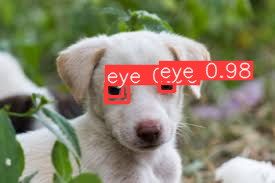

In [41]:
# model = YOLO('yolov5l.yaml').load('/content/runs/detect/train6/weights/best.pt') # build from YAML and transfer weights
result = model.predict("/content/2.jpg", save=True, conf=0.5)
plots = result[0].plot()
cv2_imshow(plots)



In [ ]:
# 모델 저장하기
torch.save(model.state_dict(), "dogeye_model_state.pth")

In [29]:
# 코랩에 저장한 .pth 파일을 내 바탕화면으로 옮기기

from google.colab import files

# 로컬로 다운로드할 .pth 파일 경로
colab_pth_path = "/content/dogeye_model_state.pth"

# Google Colab에서 로컬로 파일 다운로드
files.download(colab_pth_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil

# Colab에서 Google Drive로 폴더 복사
colab_folder_path = "코랩폴더경로"
drive_folder_path = "구글드라이브폴더경로"

shutil.copytree(colab_folder_path, drive_folder_path, dirs_exist_ok=True)



In [38]:
import shutil

# Colab에서 Google Drive로 파일 복사
colab_file_path = "코랩파일경로"
drive_folder_path = "구글드라이브폴더경로"

shutil.copy(colab_file_path, drive_folder_path)


'/content/drive/MyDrive/dogeye_yolomodel/yolov8m.pt'